In [60]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [54]:
# Load dataset and preview
df = pd.read_csv('physiological_cycles.csv')
df.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %
0,2024-11-21 03:10:47,NaN,UTC-05:00,57.0,56.0,63.0,34.07,95.00,NaN,NaN,...,329.0,357.0,134.0,70.0,125.0,28.0,580.0,100.0,92.0,69.0
1,2024-11-20 00:40:13,2024-11-21 03:10:47,UTC-05:00,72.0,55.0,65.0,34.17,96.12,6.7,2127.0,...,452.0,508.0,220.0,94.0,138.0,56.0,608.0,127.0,89.0,59.0
2,2024-11-19 01:23:10,2024-11-20 00:40:13,UTC-05:00,31.0,63.0,45.0,33.88,96.33,6.8,1891.0,...,414.0,441.0,215.0,85.0,114.0,27.0,619.0,127.0,93.0,53.0
3,2024-11-18 04:02:24,2024-11-19 01:23:10,UTC-05:00,23.0,55.0,62.0,33.80,94.80,11.3,2044.0,...,205.0,219.0,100.0,34.0,71.0,14.0,576.0,97.0,93.0,62.0
4,2024-11-17 03:25:54,2024-11-18 04:02:24,UTC-05:00,60.0,58.0,63.0,33.90,96.00,5.8,1939.0,...,458.0,534.0,181.0,113.0,164.0,76.0,609.0,127.0,86.0,64.0


In [55]:
# Create new date column without time stamps 
# Create new period column to indicate what changes I made to my lifestyle
df['Date'] = pd.to_datetime(df['Cycle start time']).dt.date
df['Period'] = 'Neutral'
df.loc[pd.to_datetime(df['Date']).dt.strftime('%Y-%m') == '2024-10', 'Period'] = 'Baseline'
df.loc[(pd.to_datetime(df['Date']) >= '2024-11-05') & 
       (pd.to_datetime(df['Date']) <= '2024-11-12'), 'Period'] = 'Coffee every morning'
df.loc[(pd.to_datetime(df['Date']) >= '2024-11-13') & 
       (pd.to_datetime(df['Date']) <= '2024-11-20'), 'Period'] = 'Milk before bed'
df.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %,Date,Period
0,2024-11-21 03:10:47,NaN,UTC-05:00,57.0,56.0,63.0,34.07,95.00,NaN,NaN,...,134.0,70.0,125.0,28.0,580.0,100.0,92.0,69.0,2024-11-21,Neutral
1,2024-11-20 00:40:13,2024-11-21 03:10:47,UTC-05:00,72.0,55.0,65.0,34.17,96.12,6.7,2127.0,...,220.0,94.0,138.0,56.0,608.0,127.0,89.0,59.0,2024-11-20,Milk before bed
2,2024-11-19 01:23:10,2024-11-20 00:40:13,UTC-05:00,31.0,63.0,45.0,33.88,96.33,6.8,1891.0,...,215.0,85.0,114.0,27.0,619.0,127.0,93.0,53.0,2024-11-19,Milk before bed
3,2024-11-18 04:02:24,2024-11-19 01:23:10,UTC-05:00,23.0,55.0,62.0,33.80,94.80,11.3,2044.0,...,100.0,34.0,71.0,14.0,576.0,97.0,93.0,62.0,2024-11-18,Milk before bed
4,2024-11-17 03:25:54,2024-11-18 04:02:24,UTC-05:00,60.0,58.0,63.0,33.90,96.00,5.8,1939.0,...,181.0,113.0,164.0,76.0,609.0,127.0,86.0,64.0,2024-11-17,Milk before bed


In [56]:
# Show missing values in each column
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
        'Missing Values': missing_values,
    })
print(missing_df[missing_df['Missing Values'] > 0])


                             Missing Values
Cycle end time                            1
Recovery score %                          2
Resting heart rate (bpm)                  2
Heart rate variability (ms)               2
Skin temp (celsius)                       2
Blood oxygen %                            2
Day Strain                                1
Energy burned (cal)                       1
Max HR (bpm)                              1
Average HR (bpm)                          1
Sleep onset                               2
Wake onset                                2
Sleep performance %                       2
Respiratory rate (rpm)                    2
Asleep duration (min)                     2
In bed duration (min)                     2
Light sleep duration (min)                2
Deep (SWS) duration (min)                 2
REM duration (min)                        2
Awake duration (min)                      2
Sleep need (min)                          2
Sleep debt (min)                

In [57]:
# Fill in missing values using mean value from respective period
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col] = df.groupby('Period')[col].transform(lambda x: x.fillna(x.mean()))
print('Missing values: ', df.isnull().sum().sum())

Missing values:  5


In [58]:
# Drop remaining rows with missing values
df.dropna(inplace=True)
print('Missing values: ', df.isnull().sum().sum())

Missing values:  0


In [59]:
# Calculate aggregated sleep metrics
df['Total sleep (min)'] = df['Light sleep duration (min)'] + df['Deep (SWS) duration (min)'] + df['REM duration (min)']
df['Sleep efficiency'] = df['Total sleep (min)'] / df['In bed duration (min)'] * 100
df['Deep sleep %'] = df['Deep (SWS) duration (min)'] / df['Total sleep (min)'] * 100
df['REM sleep %'] = df['REM duration (min)'] / df['Total sleep (min)'] * 100
df['Light sleep %'] = df['Light sleep duration (min)'] / df['Total sleep (min)'] * 100
df.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Sleep debt (min),Sleep efficiency %,Sleep consistency %,Date,Period,Total sleep (min),Sleep efficiency,Deep sleep %,REM sleep %,Light sleep %
1,2024-11-20 00:40:13,2024-11-21 03:10:47,UTC-05:00,72.0,55.0,65.0,34.17,96.12,6.7,2127.0,...,127.0,89.0,59.0,2024-11-20,Milk before bed,452.0,88.976378,20.796460,30.530973,48.672566
2,2024-11-19 01:23:10,2024-11-20 00:40:13,UTC-05:00,31.0,63.0,45.0,33.88,96.33,6.8,1891.0,...,127.0,93.0,53.0,2024-11-19,Milk before bed,414.0,93.877551,20.531401,27.536232,51.932367
3,2024-11-18 04:02:24,2024-11-19 01:23:10,UTC-05:00,23.0,55.0,62.0,33.80,94.80,11.3,2044.0,...,97.0,93.0,62.0,2024-11-18,Milk before bed,205.0,93.607306,16.585366,34.634146,48.780488
4,2024-11-17 03:25:54,2024-11-18 04:02:24,UTC-05:00,60.0,58.0,63.0,33.90,96.00,5.8,1939.0,...,127.0,86.0,64.0,2024-11-17,Milk before bed,458.0,85.767790,24.672489,35.807860,39.519651
5,2024-11-16 03:29:09,2024-11-17 03:25:54,UTC-05:00,44.0,59.0,59.0,34.30,93.19,7.4,1983.0,...,108.0,94.0,84.0,2024-11-16,Milk before bed,312.0,94.545455,13.461538,38.782051,47.756410


In [ ]:
interest = [
    'Total sleep (min)',
    'Sleep performance %',
    'Recovery score %',
    'Deep sleep %',
    'REM sleep %',
    'Light sleep %',
    'Sleep efficiency',
    'Respiratory rate (rpm)',
    'Heart rate variability (ms)',
    'Resting heart rate (bpm)'
]

# Calculate mean for each sleep metric 
means = df.groupby('Period')[interest].mean().round(2)
print("\nMean Values by Period:")
print(means)


Mean Values by Period:
                      Total sleep (min)  Sleep performance %  \
Period                                                         
Baseline                         379.64                65.96   
Coffee every morning             399.25                72.25   
Milk before bed                  369.12                63.00   
Neutral                          405.25                68.50   

                      Recovery score %  Deep sleep %  REM sleep %  \
Period                                                              
Baseline                         53.04         22.64        34.23   
Coffee every morning             54.88         21.63        32.47   
Milk before bed                  56.75         18.75        33.11   
Neutral                          50.00         20.28        37.31   

                      Light sleep %  Sleep efficiency  Respiratory rate (rpm)  \
Period                                                                          
Baseline      

In [67]:
# Calculate mean percentage changes from baseline measurements
baseline_values = means.loc['Baseline']
pct_changes = ((means - baseline_values) / baseline_values * 100).round(2)
print("\nPercentage Changes from Baseline:")
print(pct_changes.drop('Baseline'))


Percentage Changes from Baseline:
                      Total sleep (min)  Sleep performance %  \
Period                                                         
Coffee every morning               5.17                 9.54   
Milk before bed                   -2.77                -4.49   
Neutral                            6.75                 3.85   

                      Recovery score %  Deep sleep %  REM sleep %  \
Period                                                              
Coffee every morning              3.47         -4.46        -5.14   
Milk before bed                   6.99        -17.18        -3.27   
Neutral                          -5.73        -10.42         9.00   

                      Light sleep %  Sleep efficiency  Respiratory rate (rpm)  \
Period                                                                          
Coffee every morning           6.37             -1.36                    0.39   
Milk before bed               11.59              1.69  

In [75]:
# Perform t-tests to compare means of different groups
print("Statistical Analysis:")
baseline_data = df[df['Period'] == 'Baseline']
coffee_data = df[df['Period'] == 'Coffee every morning']
milk_data = df[df['Period'] == 'Milk before bed']

print("\nCoffee vs Baseline p-values:")
for metric in interest:
    t_stat, p_value = stats.ttest_ind(baseline_data[metric], 
                                     coffee_data[metric])
    print(f"{metric}: {p_value:.3f}")

print("\nMilk vs Baseline p-values:")
for metric in interest:
    t_stat, p_value = stats.ttest_ind(baseline_data[metric], 
                                     milk_data[metric])
    print(f"{metric}: {p_value:.3f}")

Statistical Analysis:

Coffee vs Baseline p-values:
Total sleep (min): 0.574
Sleep performance %: 0.315
Recovery score %: 0.808
Deep sleep %: 0.504
REM sleep %: 0.522
Light sleep %: 0.432
Sleep efficiency: 0.216
Respiratory rate (rpm): 0.540
Heart rate variability (ms): 0.628
Resting heart rate (bpm): 0.299

Milk vs Baseline p-values:
Total sleep (min): 0.758
Sleep performance %: 0.621
Recovery score %: 0.639
Deep sleep %: 0.023
REM sleep %: 0.628
Light sleep %: 0.119
Sleep efficiency: 0.155
Respiratory rate (rpm): 0.512
Heart rate variability (ms): 0.530
Resting heart rate (bpm): 0.687


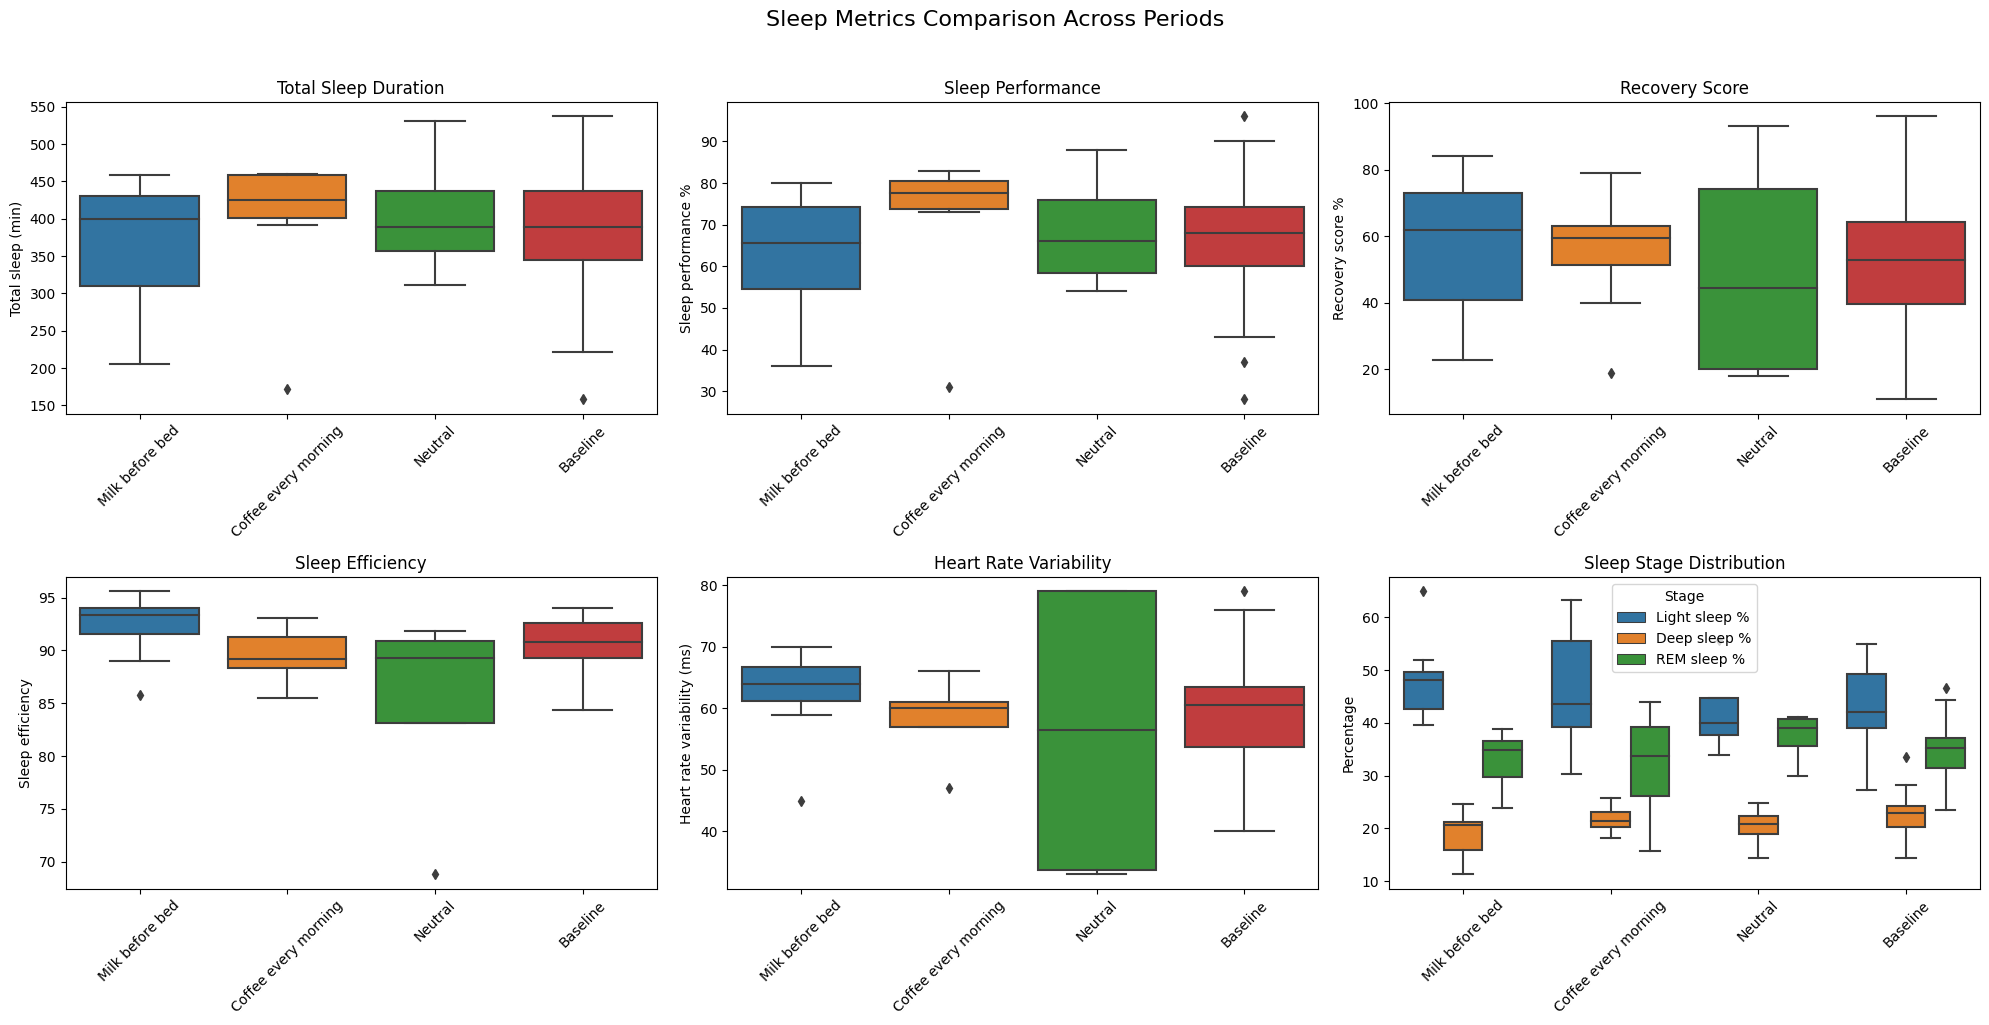

In [83]:
# Box plot visualization of target metrics
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Sleep Metrics Comparison Across Periods', fontsize=16, y=1.02)

sns.boxplot(data=df, x='Period', y='Total sleep (min)', ax=axes[0,0])
axes[0,0].set_title('Total Sleep Duration')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Period', y='Sleep performance %', ax=axes[0,1])
axes[0,1].set_title('Sleep Performance')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Period', y='Recovery score %', ax=axes[0,2])
axes[0,2].set_title('Recovery Score')
axes[0,2].set_xlabel('')
axes[0,2].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Period', y='Sleep efficiency', ax=axes[1,0])
axes[1,0].set_title('Sleep Efficiency')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Period', y='Heart rate variability (ms)', ax=axes[1,1])
axes[1,1].set_title('Heart Rate Variability')
axes[1,1].set_xlabel('')
axes[1,1].tick_params(axis='x', rotation=45)

sleep_stages = df[['Light sleep %', 'Deep sleep %', 'REM sleep %', 'Period']]
sleep_stages_melted = pd.melt(sleep_stages, id_vars=['Period'], 
                             var_name='Stage', value_name='Percentage')
sns.boxplot(data=sleep_stages_melted, x='Period', y='Percentage', hue='Stage', ax=axes[1,2])
axes[1,2].set_title('Sleep Stage Distribution')
axes[1,2].set_xlabel('')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

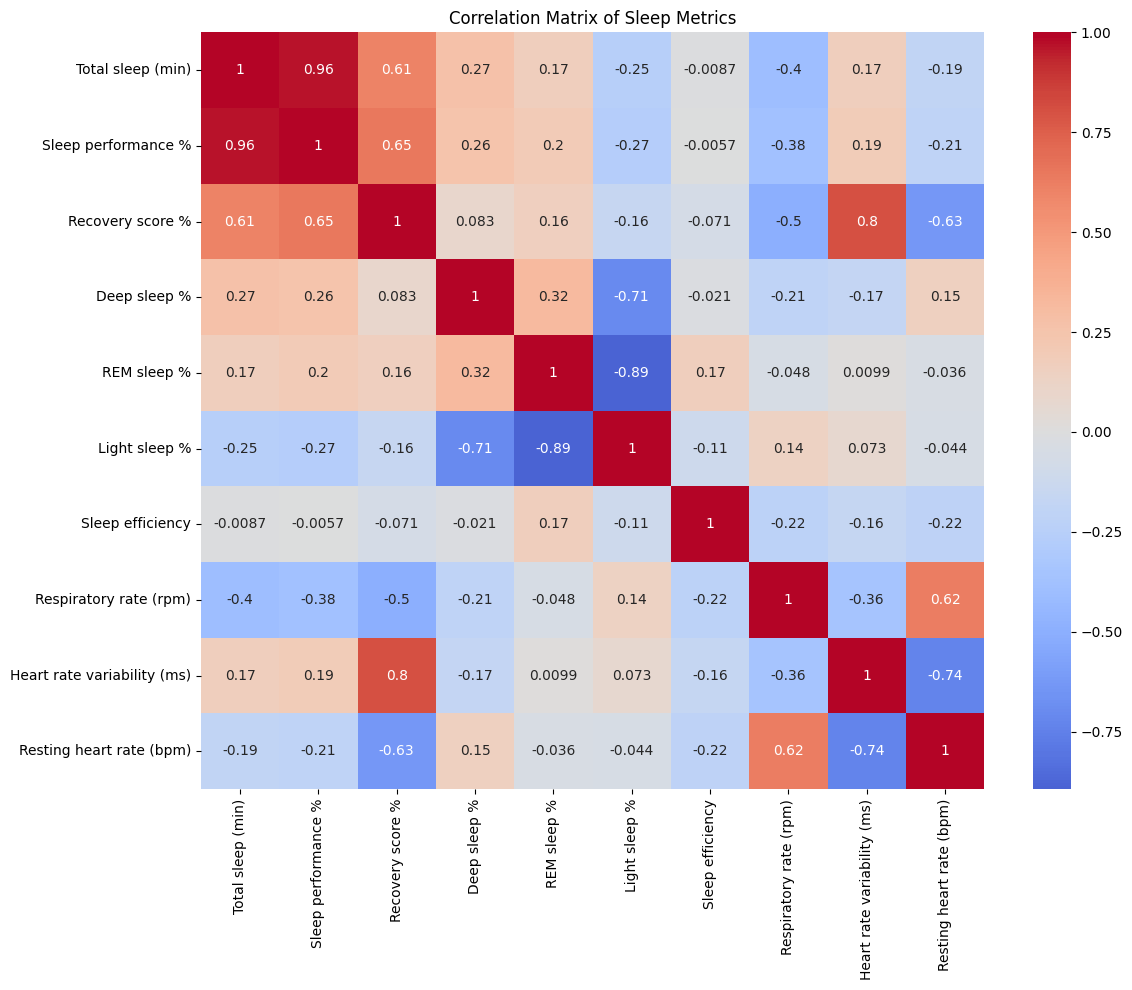

In [86]:
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_metrics = [
    'Total sleep (min)',
    'Sleep performance %',
    'Recovery score %',
    'Deep sleep %',
    'REM sleep %',
    'Light sleep %',
    'Sleep efficiency',
    'Respiratory rate (rpm)',
    'Heart rate variability (ms)',
    'Resting heart rate (bpm)'
]

corr_matrix = df[correlation_metrics].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sleep Metrics')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatter Plot of First Two Principal Components')

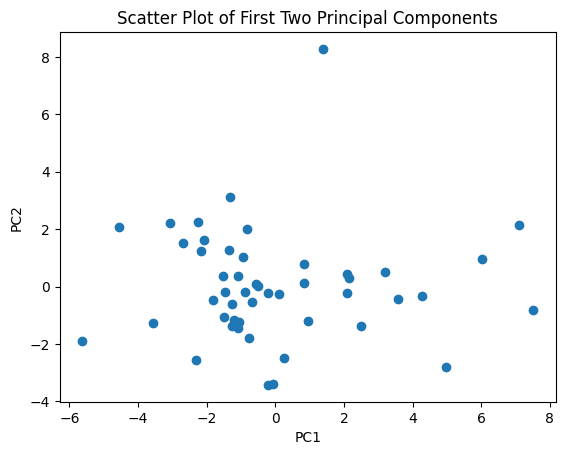

In [87]:
# Perform dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_df = df.select_dtypes(include=[float, int])

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pcs = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot scatter plot of first two principal components
plt.scatter(pcs['PC1'], pcs['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')